<a href="https://colab.research.google.com/github/Nemipatel210/GIS/blob/main/ps1_GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This cell installs the necessary libraries, `geopandas` and `mapclassify`, for working with geospatial data and creating thematic maps. The `%%capture` magic command is used to suppress the output of the installation process.

In [57]:
%%capture
#!pip install geopandas #==1.0.1
!pip install mapclassify #sometimes have to install library which you get from https://pypi.org/

This cell imports the required Python libraries, including `os`, `zipfile` for file operations, `pandas` for data manipulation, `matplotlib.pyplot` and `seaborn` for plotting, `geopandas` for geospatial data handling, and `mapclassify` for map classification. It also sets display options for the notebook.

In [58]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

import seaborn as sns

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

This cell checks and displays the installed version of the `geopandas` library.

In [59]:
#!python --version
gpd.__version__

'1.1.1'

This cell downloads a zip file containing Texas County Boundary shapefiles from a GitHub repository using the `wget` command.

In [60]:
! wget -q -O Texas_County_Boundaries_4845315375211121464.zip https://raw.githubusercontent.com/Nemipatel210/GIS/6c673d7fa088d4803b52ba23025623d675de0a7f/Texas_County_Boundaries_4845315375211121464.zip

This cell unzips the downloaded Texas County Boundary shapefile.

In [61]:
zip_ref = zipfile.ZipFile('Texas_County_Boundaries_4845315375211121464.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

This cell lists the files in the current directory to show the extracted shapefiles.

In [62]:
!ls

County_Boundaries.cpg
County_Boundaries.dbf
County_Boundaries.prj
County_Boundaries.shp
County_Boundaries.shp.xml
County_Boundaries.shx
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.cpg
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.dbf
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.prj
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shp
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shx
geo_export_b20ee172-89b9-46b7-a89d-a7138ed03a68.cpg
geo_export_b20ee172-89b9-46b7-a89d-a7138ed03a68.dbf
geo_export_b20ee172-89b9-46b7-a89d-a7138ed03a68.prj
geo_export_b20ee172-89b9-46b7-a89d-a7138ed03a68.shp
geo_export_b20ee172-89b9-46b7-a89d-a7138ed03a68.shx
sample_data
TexasCountiesCartographic.zip
Texas_County_Boundaries_4845315375211121464.zip
TexasWaterDistricts.zip


This cell reads the downloaded Texas County Boundary shapefile into a GeoDataFrame named `txC0` using `geopandas.read_file()`.

In [63]:
txC0=gpd.read_file('County_Boundaries.shp')

This cell displays the first 5 rows of the `txC0` GeoDataFrame to inspect its structure and data.

In [64]:
txC0.head(5)

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-11076323.621 3386738.492, -11076452..."
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((-10783021.183 3456095.21, -10783006...."
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((-10606980.495 3451945.262, -10606969..."
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((-10706181.772 3456563.942, -10706152..."
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((-11066621.012 3397753.016, -11066621..."


This cell generates a basic plot of the `txC0` GeoDataFrame to visualize the county boundaries.

<Axes: >

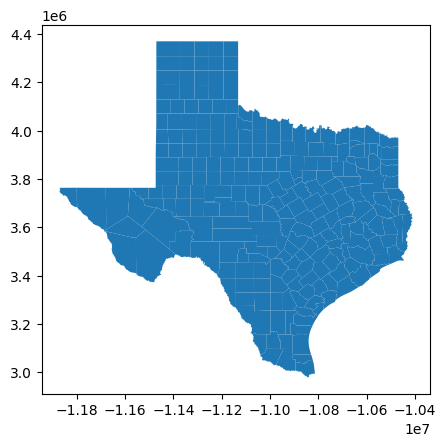

In [65]:
txC0.plot()

This cell downloads another zip file containing Texas County Cartographic shapefiles and unzips it.

In [66]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O TexasCountiesCartographic.zip https://github.com/Nemipatel210/GIS/raw/59bf3c13164b92498dd27aaef7783f833d5a1852/TexasCountiesCartographic.zip
zip_ref = zipfile.ZipFile('TexasCountiesCartographic.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

This cell lists the files in the current directory again to show the newly extracted shapefiles.

In [67]:
!ls

County_Boundaries.cpg
County_Boundaries.dbf
County_Boundaries.prj
County_Boundaries.shp
County_Boundaries.shp.xml
County_Boundaries.shx
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.cpg
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.dbf
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.prj
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shp
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shx
geo_export_b20ee172-89b9-46b7-a89d-a7138ed03a68.cpg
geo_export_b20ee172-89b9-46b7-a89d-a7138ed03a68.dbf
geo_export_b20ee172-89b9-46b7-a89d-a7138ed03a68.prj
geo_export_b20ee172-89b9-46b7-a89d-a7138ed03a68.shp
geo_export_b20ee172-89b9-46b7-a89d-a7138ed03a68.shx
sample_data
TexasCountiesCartographic.zip
Texas_County_Boundaries_4845315375211121464.zip
TexasWaterDistricts.zip


This cell reads the newly downloaded Texas County Cartographic shapefile into a GeoDataFrame named `txC1`.

In [68]:
txC1=gpd.read_file('geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shp')

This cell displays information about the `txC1` GeoDataFrame, including the column names, non-null counts, and data types.

In [69]:
txC1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   statefp   254 non-null    object  
 1   countyfp  254 non-null    object  
 2   countyns  254 non-null    object  
 3   affgeoid  254 non-null    object  
 4   geoid     254 non-null    object  
 5   name      254 non-null    object  
 6   lsad      254 non-null    object  
 7   aland     254 non-null    object  
 8   awater    254 non-null    object  
 9   geometry  254 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 20.0+ KB


This cell displays the first 10 rows of the `txC1` GeoDataFrame to inspect its structure and data, including column names like 'name' and 'aland'.

In [70]:
txC1.head(10)

,statefp,countyfp,countyns,affgeoid,geoid,name,lsad,aland,awater,geometry
0,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5..."
1,48,493,01384032,0500000US48493,48493,Wilson,06,2081662847,12111367,"POLYGON ((-98.40734 29.11444, -98.13417 29.441..."
2,48,115,01383843,0500000US48115,48115,Dawson,06,2331781556,4720730,"POLYGON ((-102.20852 32.95896, -102.07621 32.9..."
3,48,069,01383820,0500000US48069,48069,Castro,06,2316573415,12584396,"POLYGON ((-102.52518 34.74693, -102.16884 34.7..."
4,48,279,01383926,0500000US48279,48279,Lamb,06,2631897577,3973764,"POLYGON ((-102.61515 34.31289, -102.52563 34.3..."
5,48,385,01383978,0500000US48385,48385,Real,06,1810812906,2346258,"POLYGON ((-100.03088 29.84827, -100.0023 29.89..."
6,48,359,01383965,0500000US48359,48359,Oldham,06,3886337121,2339716,"POLYGON ((-103.04155 35.62249, -103.04155 35.6..."
7,48,127,01383849,0500000US48127,48127,Dimmit,06,3441795365,14576538,"POLYGON ((-100.11434 28.64812, -99.40902 28.64..."
8,48,305,01383938,0500000US48305,48305,Lynn,06,2309924845,4169719,"POLYGON ((-102.07593 33.38959, -101.55688 33.3..."
9,48,171,01383871,0500000US48171,48171,Gillespie,06,2740716834,9015052,"POLYGON ((-99.304 30.49983, -98.96423 30.49848..."


This cell generates a thematic map of Texas counties based on the 'aland' column (land area) from the `txC1` GeoDataFrame. It includes a colorbar to represent the land area values.

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Land Area by County')

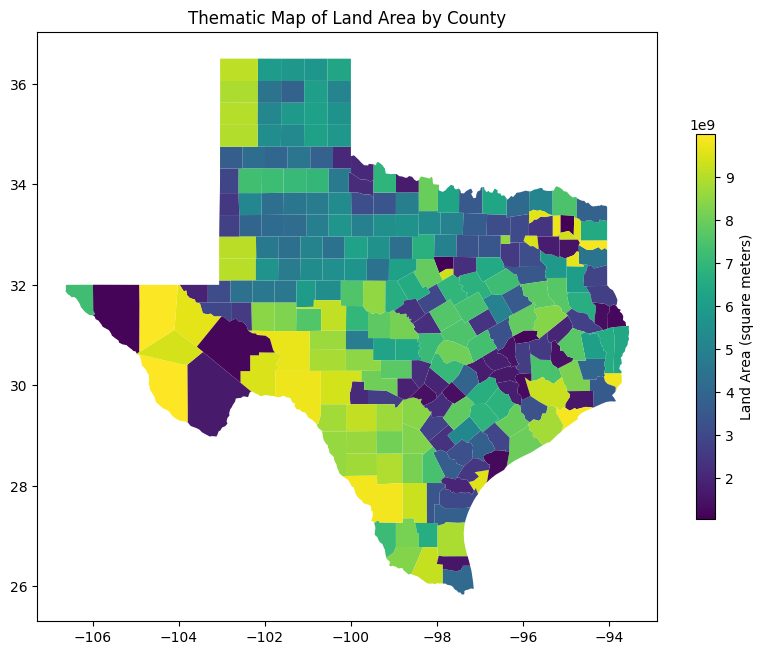

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Plot without the legend argument in plot()
txC1.plot(column='aland', ax=ax, cmap='viridis')

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=txC1['aland'].min(), vmax=txC1['aland'].max()))
sm._A = [] # Hack to make the colorbar work with ScalarMappable
cbar = fig.colorbar(sm, ax=ax, shrink=0.5) # Use shrink here
cbar.set_label('Land Area (square meters)')


ax.set_title('Thematic Map of Land Area by County')
plt.show()

This cell generates a thematic map of Texas counties based on the 'awater' column (water area) from the `txC1` GeoDataFrame. It uses a 'Blues' colormap and includes a colorbar.

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Water Area by County')

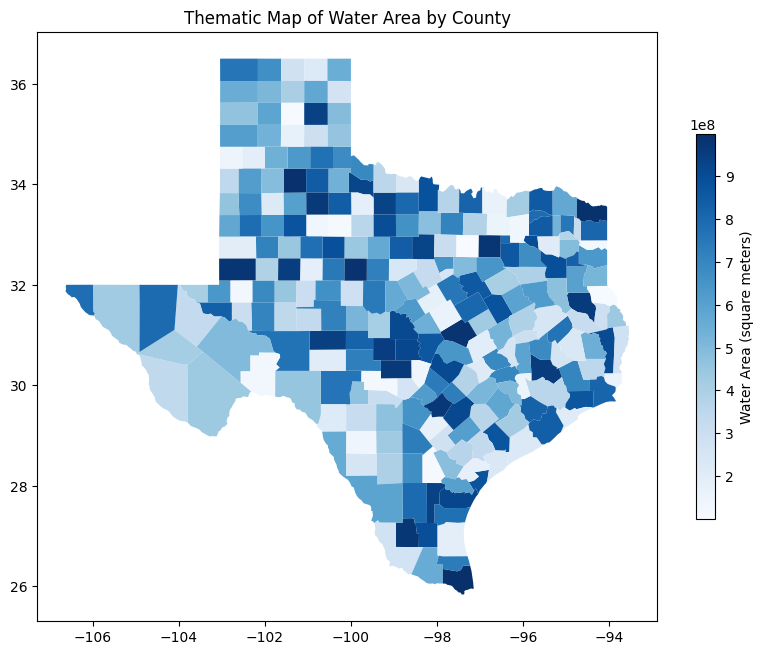

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Plot without the legend argument in plot()
txC1.plot(column='awater', ax=ax, cmap='Blues')

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=txC1['awater'].min(), vmax=txC1['awater'].max()))
sm._A = [] # Hack to make the colorbar work with ScalarMappable
cbar = fig.colorbar(sm, ax=ax, shrink=0.5) # Use shrink here
cbar.set_label('Water Area (square meters)')


ax.set_title('Thematic Map of Water Area by County')
plt.show()

This cell downloads a zip file containing Texas Water District shapefiles and unzips it.

In [73]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O TexasWaterDistricts.zip https://github.com/Nemipatel210/GIS/raw/c354060d1ac473b1e921044fcaa7b05e87b1b9ff/TexasWaterDistricts.zip
zip_ref = zipfile.ZipFile('TexasWaterDistricts.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

This cell reads the extracted Texas Water District shapefile into a GeoDataFrame named `txW`.

In [74]:
txW=gpd.read_file('geo_export_b20ee172-89b9-46b7-a89d-a7138ed03a68.shp')

This cell displays the first 10 rows of the `txW` GeoDataFrame to inspect its structure and data.

In [75]:
txW.head(10)

,county,district_n,distict_na,district_t,activity_s,affiliatio,first_name,last_name,job_title,organizati,...,phone,extension,distict_ad,bldg_suite,district_a,district_c,district_s,district_z,district_2,geometry
0,HARRIS,8473500,WESTLAKE MUD 1,Municipal Utility District,Active,RESPONSIBLE PARTY,DAVID,MARTINDALE,PRESIDENT,WESTLAKE MUD 1,...,(713)623-4531,None,1300 POST OAK BLVD,STE 2400,SCHWARTZ PAGE & HARDING LLP,HOUSTON,TX,77056,3044,POINT (-95.46013 29.75351)
1,COLLIN,5952250,NEVADA SUD,Special Utility District,Active,RESPONSIBLE PARTY,DEBRA,CALDWELL,PRESIDENT,NEVADA SUD,...,(214)548-1346,None,108 N WARREN STREET,None,None,NEVADA,TX,75173,8223,POINT (-96.37388 33.04225)
2,MONTGOMERY,6202047,MONTGOMERY COUNTY MUD 149,Municipal Utility District,Active,None,None,None,None,None,...,None,None,3200 SOUTHWEST FREEWAY,#2600,None,HOUSTON,TX,77027,7537,POINT (-95.42892 29.7308)
3,GALVESTON,3209909,GALVESTON COUNTY MUD 73,Municipal Utility District,Active,RESPONSIBLE PARTY,CYNTHIA,ALDAPE,BOARD PRESIDENT,GALVESTON COUNTY MUD 73,...,(281)500-6050,None,202 CENTURY SQUARE BLVD,None,None,SUGAR LAND,TX,77478,3796,POINT (-95.60706 29.62412)
4,MONTGOMERY,5859000,MONTGOMERY COUNTY UTILITY DISTRICT 3,Municipal Utility District,Active,RESPONSIBLE PARTY,DORIS,HICKMAN,PRESIDENT,MONTGOMERY COUNTY UTILITY DISTRICT 3,...,(713)651-8353,None,1301 MCKINNEY ST,STE 5100,None,HOUSTON,TX,77010,3095,POINT (-95.36158 29.75557)
5,MONTGOMERY,5857848,MONTGOMERY COUNTY MUD 244,Municipal Utility District,Inactive,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,ANDERSON,8130000,UPPER NECHES RIVER MUNICIPAL WATER AUTHORITY,River Authority,Active,RESPONSIBLE PARTY,JESSE,HICKMAN,PRESIDENT,UPPER NECHES RIVER MUNICIPAL WATER AUTHORITY,...,(903)876-2237,None,PO BOX 1965,None,None,PALESTINE,TX,75802,None,None
7,DIMMIT,8682600,WINTERGARDEN GCD,Groundwater Conservation District,Active,None,None,None,None,None,...,None,None,PO BOX 1433,None,None,CARRIZO SPRINGS,TX,78834,7433,None
8,MONTGOMERY,5858500,MONTGOMERY COUNTY UTILITY DISTRICT 2,Municipal Utility District,Active,RESPONSIBLE PARTY,KEVIN,LACY,PRESIDENT,MONTGOMERY COUNTY UTILITY DISTRICT 2,...,(713)651-0111,None,9 GREENWAY PLZ,STE 1100,COATS ROSE YALE RYMAN & LEE PC,HOUSTON,TX,77046,0307,POINT (-95.4185 29.7199)
9,HARRIS,3739608,HARRIS COUNTY MUD 495,Municipal Utility District,Active,RESPONSIBLE PARTY,MARTIN,BURNS,PRESIDENT,HARRIS COUNTY MUD 495,...,(713)860-6400,None,3200 SOUTHWEST FWY,STE 2600,ALLEN BOONE HUMPHRIES ROBINSON LLP,HOUSTON,TX,77027,7537,POINT (-95.42861 29.7304)


This cell generates a basic plot of the `txW` GeoDataFrame to visualize the water district points.

<Axes: >

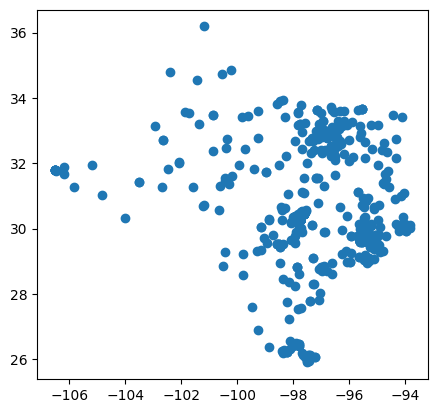

In [76]:
txW.plot()

This cell displays the data types of each column in the `txW` GeoDataFrame.

In [77]:
txW.dtypes

,0
county,object
district_n,object
distict_na,object
district_t,object
activity_s,object
affiliatio,object
first_name,object
last_name,object
job_title,object
organizati,object


This cell selects the 'county' and 'geometry' columns from the `txW` GeoDataFrame and creates a new GeoDataFrame named `txj`.

In [78]:
txj=txW[['county','geometry']]

This cell selects the 'name', 'aland', and 'geometry' columns from the `txC1` GeoDataFrame, renames the 'name' column to 'county', and converts the 'county' names to uppercase for consistency before joining.

In [79]:
tcj2=txC1[['name','aland','geometry']]
tcj2 = tcj2.rename(columns={'name': 'county'})
tcj2['county'] = tcj2['county'].str.upper()

This cell performs an inner merge between `txj` (water districts) and `tcj2` (counties) based on the 'county' column. It then converts the 'aland' column to numeric, coercing errors, and displays the head of the resulting GeoDataFrame.

In [80]:
joined_df_outer = txj.merge(tcj2, on='county', how='outer')

# Convert 'aland' to numeric, coercing errors to NaN
joined_df_outer['aland'] = pd.to_numeric(joined_df_outer['aland'], errors='coerce')

# Display the first few rows of the outer joined DataFrame
display(joined_df_outer.head(5))

,county,geometry_x,aland,geometry_y
0,ANDERSON,None,2.752129e+09,"POLYGON ((-96.05279 32.00589, -95.42851 32.084..."
1,ANDERSON,None,2.752129e+09,"POLYGON ((-96.05279 32.00589, -95.42851 32.084..."
2,ANDREWS,None,3.886850e+09,"POLYGON ((-103.0647 32.52219, -102.21104 32.52..."
3,ANGELINA,POINT (-94.97431 31.93658),2.066242e+09,"POLYGON ((-95.00334 31.42571, -94.86586 31.526..."
4,ANGELINA,POINT (-94.75974 31.36437),2.066242e+09,"POLYGON ((-95.00334 31.42571, -94.86586 31.526..."


This cell displays information about the `joined_df_outer` GeoDataFrame, including column names, non-null counts, and data types.

In [81]:
joined_df_outer.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   county      2969 non-null   object  
 1   geometry_x  2033 non-null   geometry
 2   aland       2969 non-null   float64 
 3   geometry_y  2969 non-null   geometry
dtypes: float64(1), geometry(2), object(1)
memory usage: 93.9+ KB


This cell creates a map visualizing water district points overlaid on county boundaries using the `joined_df_outer` GeoDataFrame resulting from an outer join. It plots the county boundaries with a light grey fill and black outline and the water district points in blue.

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Water District Points Overlay on County Boundaries')

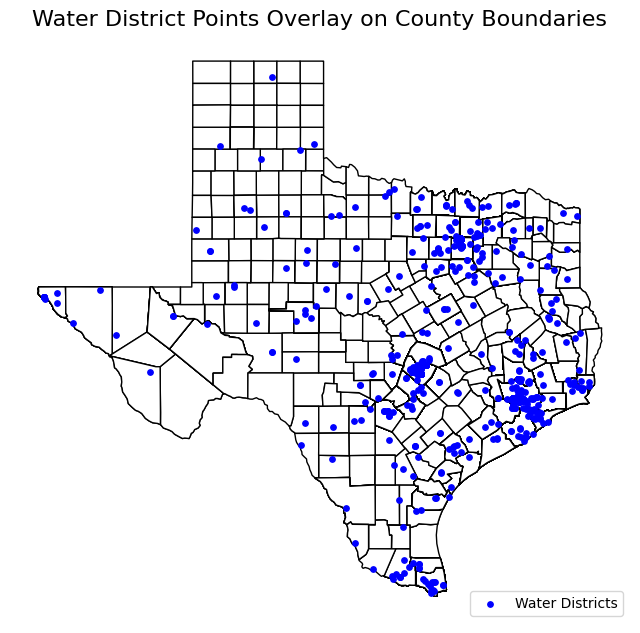

In [88]:
# Set 'geometry_y' (county polygons) as the active geometry for the base layer plot
joined_df_outer_counties = joined_df_outer.set_geometry('geometry_y')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 12)) # Increased figure size

# Plot the county boundaries with a uniform color (e.g., light grey) or just an outline
# Using facecolor='lightgrey' for uniform land color and edgecolor='black' for boundaries
joined_df_outer_counties.plot(ax=ax, facecolor='white', edgecolor='black')


# Set 'geometry_x' (water district points) as the active geometry for the points plot
joined_df_outer_points = joined_df_outer.set_geometry('geometry_x')

# Plot the points on top of the county map
# Using a contrasting color like 'blue' for visibility against light grey land
# We need to drop rows with None geometries before plotting points
joined_df_outer_points.dropna(subset=['geometry_x']).plot(ax=ax, marker='o', color='blue', markersize=15, label='Water Districts') # Slightly reduced marker size and added label for points legend


# Optional: Add titles and remove axes for a cleaner look
ax.set_title("Water District Points Overlay on County Boundaries", fontsize=16) # Updated title
ax.set_axis_off()

# Add a legend for the points
ax.legend(loc='lower right')

# Display the final map
plt.show()